<h1><center>Model Selection - Cross Validation Techniques</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
employee_data = pd.read_csv("../../Data/regression_employee_data.csv")

In [3]:
employee_data.head()

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band
0,e1,Director,16.0,85861,0.526928,5,1678,Grad,NaN,15.0,clg,M,A
1,e2,Jr.Dev,3.0,25376,6.420421,18,6082,Grad,Btech,16.0,clg,F,C
2,e3,Sr.Dev,6.0,38193,2.802337,7,2927,PostGrad,Msc,17.0,unv,M,B
3,e4,Jr.Dev,3.0,22807,9.374888,23,10249,NaN,Mtech,18.0,NaN,F,C
4,e5,Sr.Dev,4.0,37624,3.336564,10,3159,NaN,Btech,16.0,NaN,F,B


#### Split data into Train and Test

In [4]:
shuffleSplit = ShuffleSplit(n_splits=1, test_size=0.2, random_state=33)
for train_index, test_index in shuffleSplit.split(employee_data):
    train_set = employee_data.loc[train_index]
    test_set = employee_data.loc[test_index]

In [5]:
train_set.shape

(1209, 13)

In [6]:
test_set.shape

(303, 13)

#### Data Pre-Processing

In [7]:
cat_list_dict = {'Designation': ['Sr.Dev', 'Analyst', 'Sr.Analyst', 'Manager', 'Jr.Dev', 'Director', 'Sr.Manager'],
                'Qualification': ['Grad', 'PostGrad', 'Phd', 'postdoc'],
                'Degree': ['Btech', 'Bsc', 'Msc', 'Mba', 'IntMsc', 'B.A', 'Mtech'],
                'EducationalInstitute' : ['unv', 'iit', 'clg', 'cunv'],
                'Gender': ['M', 'F'],
                'Empl_Band': ['B', 'C', 'A']}

In [8]:
def convertCategorisToCodes(columns, df):
    for column in columns:
        df[column] = pd.Categorical(df[column], categories = cat_list_dict[column])
        df[column] = df[column].cat.codes

In [9]:
YearsOfStudy_impute_value = train_set['YearsOfStudy'].mode().values[0]
Qualification_impute_value = train_set['Qualification'].mode().values[0]
Degree_impute_value = train_set['Degree'].mode().values[0]
EducationalInstitute_impute_value = train_set['EducationalInstitute'].mode().values[0]

In [10]:
train_set.loc[train_set[train_set['LinesOfCode'] < 0].index.values, 'LinesOfCode'] = 0
train_set.drop('Emp #', axis=1, inplace=True)
train_set['YearsOfStudy'].fillna(YearsOfStudy_impute_value, inplace=True)
train_set['Qualification'].fillna(Qualification_impute_value, inplace=True)
train_set['Degree'].fillna(Degree_impute_value, inplace=True)
train_set['EducationalInstitute'].fillna(EducationalInstitute_impute_value, inplace=True)
convertCategorisToCodes(train_set.select_dtypes(['object']).columns.values, train_set)

In [11]:
train_X = train_set.loc[:,[x for x in train_set.columns if x not in ['Salary']]]
train_y = train_set['Salary']

### Model Selection Process

In [12]:
# Cross Validation Score Options

from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


#### How Cross Validation works ?

In [19]:
from sklearn.model_selection import cross_validate

lr_model = LinearRegression()
cv_val = cross_validate(lr_model, train_X, train_y, cv=20, return_train_score=True, scoring='neg_mean_absolute_error')

cv_val

{'fit_time': array([0.00299239, 0.00397158, 0.00304651, 0.00299335, 0.0039885 ,
        0.00299168, 0.00215244, 0.00295568, 0.00300598, 0.00301957,
        0.00199413, 0.00302839, 0.00293398, 0.00199461, 0.00176334,
        0.00270462, 0.00498652, 0.00302339, 0.00182176, 0.00299144]),
 'score_time': array([0.00152802, 0.00099659, 0.00193834, 0.00201368, 0.00099754,
        0.00099969, 0.00083947, 0.00103426, 0.00176716, 0.00096917,
        0.00102735, 0.00199533, 0.00099659, 0.0009973 , 0.0009973 ,
        0.00205922, 0.00099707, 0.00096679, 0.00092745, 0.00099659]),
 'test_score': array([ -8187.57354696,  -8694.9202253 ,  -8501.69664804,  -9038.06034239,
         -7389.29614979,  -9314.81452843,  -9354.04807128,  -9339.20284232,
         -7850.61384912,  -8366.46458009,  -7648.35318088,  -8687.18419726,
         -8698.03311583,  -7226.90538308,  -9013.71501303, -11410.98383564,
         -6977.20971528,  -8128.47026918,  -9457.4065146 , -10705.55094431]),
 'train_score': array([-8672.3

In [20]:
print("Train Error: ", cv_val['train_score'].mean())
print("Cross Validation Error: ", cv_val['test_score'].mean())

Train Error:  -8610.096988670624
Cross Validation Error:  -8699.52514764058


#### Learning Curve & Cross Validation scores to find BEST Model

Text(0, 0.5, 'Mean Absolute Error')

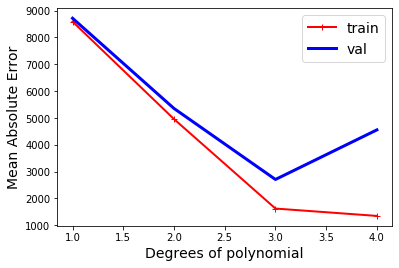

In [23]:
cv_errors_train, cv_errors_test = [], []
for d in range(1,5):
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    train_X_poly = poly_features.fit_transform(train_X)
    cv_val = cross_validate(lr_model, train_X_poly, train_y, cv=3, 
                            return_train_score=True, scoring='neg_mean_absolute_error')
    
    cv_errors_train.append(- cv_val['train_score'].mean())
    cv_errors_test.append(- cv_val['test_score'].mean())    
    
    
plt.plot(range(1,5), cv_errors_train, "r-+", linewidth=2, label="train")
plt.plot(range(1,5), cv_errors_test, "b-", linewidth=3, label="val")
plt.legend(loc="upper right", fontsize=14)   
plt.xlabel("Degrees of polynomial", fontsize=14) 
plt.ylabel("Mean Absolute Error", fontsize=14)

#### Apply BEST model to TRAIN and TEST

In [24]:
poly_features = PolynomialFeatures(degree=3, include_bias=True)
train_X_poly = poly_features.fit_transform(train_X)
train_X_poly.shape

(1209, 364)

In [25]:
lr_model.fit(train_X_poly, train_y)
train_prediction = lr_model.predict(train_X_poly)

In [26]:
train_mse = mean_squared_error(train_y, train_prediction)
r2_train = r2_score(train_y, train_prediction)

print("Train R-Square score: ", r2_train)
print("Train Root Mean Squared Error: ", np.sqrt(train_mse))

Train R-Square score:  0.986900328761218
Train Root Mean Squared Error:  2210.935668970049


In [27]:
test_set.loc[test_set[test_set['LinesOfCode'] < 0].index.values, 'LinesOfCode'] = 0
test_set.drop('Emp #', axis=1, inplace=True)
test_set['YearsOfStudy'].fillna(YearsOfStudy_impute_value, inplace=True)
test_set['Qualification'].fillna(Qualification_impute_value, inplace=True)
test_set['Degree'].fillna(Degree_impute_value, inplace=True)
test_set['EducationalInstitute'].fillna(EducationalInstitute_impute_value, inplace=True)
convertCategorisToCodes(test_set.select_dtypes(['object']).columns.values, test_set)
test_X = test_set.loc[:,['Designation', 'Experience', 'AggrBehavScore', 'ActivityScore', 'LinesOfCode', 'Qualification',
 'Degree', 'YearsOfStudy', 'EducationalInstitute', 'Gender', 'Empl_Band']]
test_y = test_set['Salary']

In [28]:
test_X_poly = poly_features.transform(test_X)

In [29]:
test_X_poly.shape

(303, 364)

In [30]:
test_prediction = lr_model.predict(test_X_poly)

In [31]:
test_mse = mean_squared_error(test_y, test_prediction)
r2_test = r2_score(test_y, test_prediction)

print("Train R-Square score: ", r2_test)
print("Train Root Mean Squared Error : ", np.sqrt(test_mse))

Train R-Square score:  0.9817350649589138
Train Root Mean Squared Error :  2679.22023738637
